# Example spiking activity (Fig 1b hidden layer)

In [1]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt

fileName = 'sparse050_10class_noise_100_t0_mem_rec_e1_b0_2024-01-18_12-18-19.pkl'
folder = '/media/adamlab/My Passport/LIF Analysis Data/FashionMNIST/raw_data/example_mem_rec'

In [2]:
with open(folder+'/'+fileName, 'rb') as f:
    mem_rec = pickle.load(f)

In [8]:
mem_rec_np = mem_rec[0].detach().numpy()
mem_rec_np.shape

(100, 100)

In [13]:
batch = 1
batch_rec = mem_rec[batch].detach().numpy()

spike_time_exc = []
spike_index_exc = []
spike_time_inh = []
spike_index_inh = []

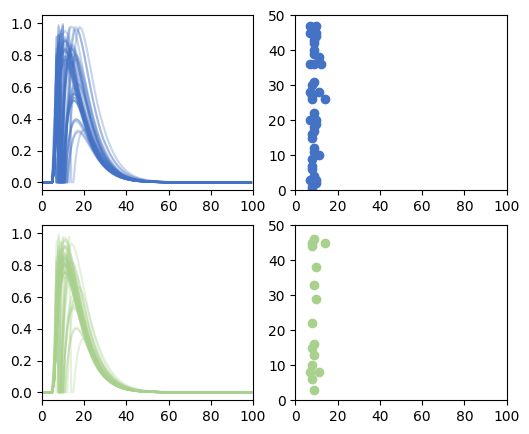

In [15]:
for t in range(100):
    for i in range(100):
        if batch_rec[t,i]>1:
            batch_rec[t,i] = 0
            if i<50:
                spike_time_exc.append(t)
                spike_index_exc.append(i)
            else:
                spike_time_inh.append(t)
                spike_index_inh.append(i)
                

fig, axs = plt.subplots(2,2, figsize=(6,5))
for i in range(50):
    axs[0][0].plot(range(100), batch_rec[:,i], color='#4472C4', alpha=0.3)

for i in range(50,100):
    axs[1][0].plot(range(100), batch_rec[:,i], color='#A9D18E', alpha=0.3)
    
axs[0][1].scatter(spike_time_exc, spike_index_exc, color='#4472C4')
axs[1][1].scatter(spike_time_inh, [i-50 for i in spike_index_inh], color='#A9D18E')
for i in range(2):
    axs[i][1].set_xlim(0,100)
    axs[i][1].set_ylim(0,50)
    axs[i][0].set_xlim(0,100)
    axs[i][0].set_ylim(-0.05,1.05)

plt.savefig('example spikes_SR.svg')
#for i in range(2):
#    axs[i].grid()